# Clustering 
1. Import Data
2. Do short preprocessing
3. Run algorithms
4. CHoose best ones and hyper tune
5. Do the same for user data

In [1]:
# Load Libraries
import pandas as pd
import re
import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import itertools
import numpy as np
import seaborn as sns

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBRegressor

#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Load the data

df_movies = pd.read_csv("classificationPreprocessingGeneral.csv")
print("Length after import: " + str(len(df_movies)))
df_movies = df_movies.fillna(0)
print(df_movies.head(5))
df_movies.columns

Length after import: 43872
     budget     id  runtime  Documentary  Foreign  Action  Horror  War  \
0  30000000    862     81.0          0.0      0.0     0.0     0.0  0.0   
1  65000000   8844    104.0          0.0      0.0     0.0     0.0  0.0   
2         0  15602    101.0          0.0      0.0     0.0     0.0  0.0   
3  16000000  31357    127.0          0.0      0.0     0.0     0.0  0.0   
4         0  11862    106.0          0.0      0.0     0.0     0.0  0.0   

   Romance  Adventure  ...  actor_Donald Sutherland  actor_Robert De Niro  \
0      0.0        0.0  ...                        0                     0   
1      0.0        1.0  ...                        0                     0   
2      1.0        0.0  ...                        0                     0   
3      1.0        0.0  ...                        0                     0   
4      0.0        0.0  ...                        0                     0   

   actor_Samuel L. Jackson  actor_Jackie Chan  actor_Michael Cain

Index(['budget', 'id', 'runtime', 'Documentary', 'Foreign', 'Action', 'Horror',
       'War', 'Romance', 'Adventure', 'Thriller', 'History', 'Drama', 'Family',
       'Comedy', 'TV Movie', 'Crime', 'Western', 'Mystery', 'Fantasy',
       'Animation', 'Music', 'Science Fiction', 'part_of_collection', '+18',
       'hasHomepage', '18+', 'spokenLanguages', 'movieId', 'imdbId',
       'director', 'actors', 'pcomp_Orion Pictures', 'pcomp_New Line Cinema',
       'pcomp_Gaumont', 'pcomp_Twentieth Century Fox Film Corporation',
       'pcomp_Walt Disney Productions', 'pcomp_Paramount Pictures',
       'pcomp_Universal Pictures', 'pcomp_Village Roadshow Pictures',
       'pcomp_StudioCanal', 'pcomp_Columbia Pictures Corporation',
       'pcomp_Regency Enterprises', 'pcomp_Touchstone Pictures',
       'pcomp_Mosfilm', 'pcomp_RKO Radio Pictures', 'pcomp_Miramax Films',
       'pcomp_TriStar Pictures', 'pcomp_Columbia Pictures',
       'pcomp_Toho Company', 'pcomp_Relativity Media',
       'pcomp

After we loaded all the libaries and data that we need, we can start with the classification tasks.

Since we have a lot of features it makes sense to eliminate features that do not have a significant impact on the prediction to improve our perfromance. Also we have to drop the columns that are anyways not needed like to actor column, which got one hot encoded already in preprocessing or the ids of the movie...

In [3]:
# drop columns that are not needed maybe implement feature selction...



features_to_remove = ['actors', 'movieId', 'imdbId', 'id', '+18','spokenLanguages'
                     ]
for i in features_to_remove:
    if i in df_movies.columns:
        df_movies = df_movies.drop(columns=i)
print(df_movies.head(5))
df_movies.columns

     budget  runtime  Documentary  Foreign  Action  Horror  War  Romance  \
0  30000000     81.0          0.0      0.0     0.0     0.0  0.0      0.0   
1  65000000    104.0          0.0      0.0     0.0     0.0  0.0      0.0   
2         0    101.0          0.0      0.0     0.0     0.0  0.0      1.0   
3  16000000    127.0          0.0      0.0     0.0     0.0  0.0      1.0   
4         0    106.0          0.0      0.0     0.0     0.0  0.0      0.0   

   Adventure  Thriller  ...  actor_Donald Sutherland  actor_Robert De Niro  \
0        0.0       0.0  ...                        0                     0   
1        1.0       0.0  ...                        0                     0   
2        0.0       0.0  ...                        0                     0   
3        0.0       0.0  ...                        0                     0   
4        0.0       0.0  ...                        0                     0   

   actor_Samuel L. Jackson  actor_Jackie Chan  actor_Michael Caine  \
0   

Index(['budget', 'runtime', 'Documentary', 'Foreign', 'Action', 'Horror',
       'War', 'Romance', 'Adventure', 'Thriller', 'History', 'Drama', 'Family',
       'Comedy', 'TV Movie', 'Crime', 'Western', 'Mystery', 'Fantasy',
       'Animation', 'Music', 'Science Fiction', 'part_of_collection',
       'hasHomepage', '18+', 'director', 'pcomp_Orion Pictures',
       'pcomp_New Line Cinema', 'pcomp_Gaumont',
       'pcomp_Twentieth Century Fox Film Corporation',
       'pcomp_Walt Disney Productions', 'pcomp_Paramount Pictures',
       'pcomp_Universal Pictures', 'pcomp_Village Roadshow Pictures',
       'pcomp_StudioCanal', 'pcomp_Columbia Pictures Corporation',
       'pcomp_Regency Enterprises', 'pcomp_Touchstone Pictures',
       'pcomp_Mosfilm', 'pcomp_RKO Radio Pictures', 'pcomp_Miramax Films',
       'pcomp_TriStar Pictures', 'pcomp_Columbia Pictures',
       'pcomp_Toho Company', 'pcomp_Relativity Media',
       'pcomp_Walt Disney Pictures', 'pcomp_BBC Films', 'pcomp_United Artist

Now that we have exactly the data we want we start with the spitting.

1. First of all we separate the features from our targte(the rating).
2. We split our data into training and test data in order to evaluate our model later. The proportions will be 60% to 40%
3. We create a kfold cross validation that we will later use for our models in order to evaluate them better
4. We encode data that needs to be encoded -> ratings and directors

Train: 26323 Features and 26323 Ratings
Test: 17549 Features and 17549 Ratings


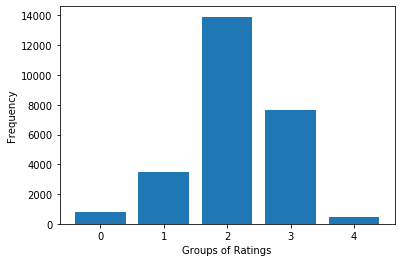

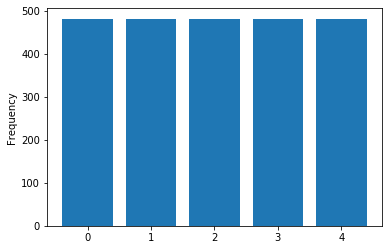

In [20]:
# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# separate features and target variable
rating = df_movies['Rating_Label'] # weight
features = df_movies.drop(columns=['Rating_Label'])

# encode labels
lab_enc = LabelEncoder()
rating = lab_enc.fit_transform(rating)
features["director"] = features["director"].astype(str)
features["director"] = lab_enc.fit_transform(features["director"])

# create a train/test split
features_train, features_test, rating_train, rating_test = train_test_split(features, rating, test_size=0.4, random_state=42, stratify=rating )

print("Train: " + str(len(features_train)) + " Features and " + str(len(rating_train)) + " Ratings")
print("Test: " + str(len(features_test)) + " Features and " + str(len(rating_test)) + " Ratings")

class_dist = pd.Series(rating_train).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.xlabel("Groups of Ratings")
plt.show()

from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
features_balanced_train, rating_balanced_train = sampler.fit_resample(features_train, rating_train)

class_dist = pd.Series(rating_balanced_train).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
# plt.show()


# from imblearn.over_sampling import RandomOverSampler

# sampler = RandomOverSampler()
# features_balanced_train, rating_balanced_train = sampler.fit_resample(features_train, rating_train)

# class_dist = pd.Series(rating_balanced_train).value_counts()
# plt.bar(class_dist.index, class_dist)
# plt.ylabel("Frequency")
# plt.show()

features_train = features_balanced_train
rating_train = rating_balanced_train

# Initial evaluation of different classifiers

In [5]:
##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

print("Scores Random Forest:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_rf)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_rf)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_rf, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_rf, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_rf, average='weighted')))
print()

##### create and fit a KNN
knn_reg = KNeighborsClassifier()
knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn:")
# #compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_knn)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_knn)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_knn, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_knn, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_knn, average='weighted')))
print()

##### create and fit a DecisionTreeClassifier
dt_reg = DecisionTreeClassifier()
dt_reg.fit(features_train, rating_train)
rating_pred_dt = dt_reg.predict(features_test)

print("Scores Decision Tree:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_dt)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_dt)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_dt, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_dt, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_dt, average='weighted')))
print()

##### create and fit a GaussianNB
nb_reg = GaussianNB()
nb_reg.fit(features_train, rating_train)
rating_pred_nb = nb_reg.predict(features_test)

print("Scores Naive Bayes:")
# #compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_nb)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_nb)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_nb, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_nb, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_nb, average='weighted')))
print()

##### create and fit a SVC
svc_reg = LinearSVC()
svc_reg.fit(features_train, rating_train)
rating_pred_svc = svc_reg.predict(features_test)

print("Scores SVC:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_svc)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_svc)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_svc, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_svc, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_svc, average='weighted')))
print()

#plot the confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=lab_enc.classes_, title='KNN Classifier')

print()

# metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))



C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores Random Forest:
Accuracy: 0.2460539062054818
Precision: 0.42363691976484313
Recall: 0.2460539062054818
f1_score: 0.29253766146361887

Scores knn:
Accuracy: 0.21374437289874068
Precision: 0.3962198946911243
Recall: 0.21374437289874068
f1_score: 0.25981647472688013

Scores Decision Tree:
Accuracy: 0.23767736053336372
Precision: 0.42005220201108506
Recall: 0.23767736053336372
f1_score: 0.283404073199742

Scores Naive Bayes:
Accuracy: 0.0725967291583566
Precision: 0.4204011141728365
Recall: 0.0725967291583566
f1_score: 0.0792993088334181

Scores SVC:
Accuracy: 0.42817254544418487
Precision: 0.4115783902527232
Recall: 0.4281725454441848
f1_score: 0.3408176205801919




C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## It seems that KNN & Random Forrest are the best classifiers. With those two we will now do some parameter tuning...

We will see with wich k the algorithm works best:

In [6]:
# create and fit a knn classifier
knn_reg = KNeighborsClassifier()

knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn:")

# specify the parameter grid
parameters = {
    'n_neighbors': range(2, 30)
}


# create the grid search instance
grid_search_estimator = GridSearchCV(knn_reg, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(features_train, rating_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
#display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

Scores knn:
best score is 0.22744282744282746 with params {'n_neighbors': 18}


In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Scores knn:
Fold 0: Accuracy = 17.142857142857142%
Fold 1: Accuracy = 21.25%
Fold 2: Accuracy = 18.75%
Fold 3: Accuracy = 19.583333333333332%
Fold 4: Accuracy = 20.833333333333336%
Fold 5: Accuracy = 18.75%
Fold 6: Accuracy = 22.5%
Fold 7: Accuracy = 21.666666666666668%
Fold 8: Accuracy = 23.333333333333332%
Fold 9: Accuracy = 20.0%
Average Accuracy = 20.380952380952383%

Accuracy on Test Data: 0.21665052139723062
f1_score on Test Data: 0.26615055483384353
Confusion matrix, without normalization
[[ 160  100   96   88   92]
 [ 639  415  508  401  336]
 [2408 1656 2253 1505 1455]
 [1317  905 1255  920  720]
 [ 106   57   57   46   54]]


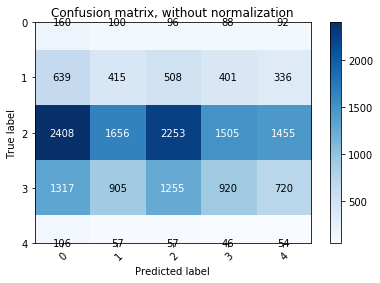

In [8]:
# do now Knn with k = 2 and applie 10 cross fold

# create and fit a knn classifier
knn_reg = KNeighborsClassifier(n_neighbors=28)

knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn:")


#compute accuracy score

accuracy_knn = cross_val_score(knn_reg, features_train, rating_train, cv=stratified_10_fold_cv, scoring='accuracy')

for i, acc in enumerate(accuracy_knn):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_knn.mean() * 100.0))
print()
print("Accuracy on Test Data: {}".format(accuracy_score(rating_test, rating_pred_knn)))
print("f1_score on Test Data: {}".format(f1_score(rating_test, rating_pred_knn, average='weighted')))

class_names = ['0','1','2','3','4','5']


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(rating_test, rating_pred_knn, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


Tuning of Random forrest:

In [9]:
##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

#Tuning of algorithm

# specify the parameter grid
parameters = {
    'max_depth':[3,5,10,None],
     'criterion':["gini", "entropy"],
     'max_features':["auto","log2",None]
}


# create the grid search instance
grid_search_estimator = GridSearchCV(rf_reg, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(features_train, rating_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
#display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))




print()


C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


best score is 0.3130977130977131 with params {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}



Scores Random Forrest:


C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold 0: Accuracy = 31.428571428571427%
Fold 1: Accuracy = 30.833333333333336%
Fold 2: Accuracy = 31.25%
Fold 3: Accuracy = 32.916666666666664%
Fold 4: Accuracy = 30.0%
Fold 5: Accuracy = 24.166666666666668%
Fold 6: Accuracy = 33.33333333333333%
Fold 7: Accuracy = 28.749999999999996%
Fold 8: Accuracy = 27.500000000000004%
Fold 9: Accuracy = 27.916666666666668%
Average Accuracy = 29.809523809523807%

Accuracy on Test Data: 0.24445837369650691
f1_score on Test Data: 0.2633349935667384
Confusion matrix, without normalization
[[ 129  113   38   99  157]
 [ 502  509  227  474  587]
 [ 990 1352 1276 3420 2239]
 [ 304  407  637 2213 1556]
 [  22   23   29   83  163]]


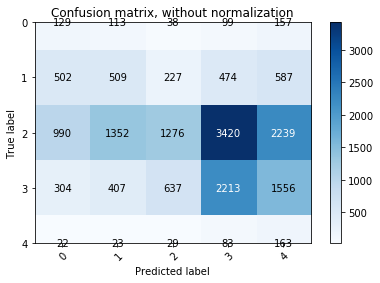

In [10]:
# do now Random Forest with entropy, maxdeepth 3 and applie 10 cross fold

##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto')
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

print("Scores Random Forrest:")


#compute accuracy score

accuracy_knn = cross_val_score(rf_reg, features_train, rating_train, cv=stratified_10_fold_cv, scoring='accuracy')

for i, acc in enumerate(accuracy_knn):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_knn.mean() * 100.0))
print()
print("Accuracy on Test Data: {}".format(accuracy_score(rating_test, rating_pred_rf)))
print("f1_score on Test Data: {}".format(f1_score(rating_test, rating_pred_rf, average='weighted')))

class_names = ['0','1','2','3','4','5']


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(rating_test, rating_pred_rf, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


## Analysis of Modell with Cluster Data

In [11]:
#Load the data

df_movies_cluster = pd.read_csv("classificationPreprocessingWithClustering.csv")
print("Length after import: " + str(len(df_movies)))
df_movies_cluster = df_movies_cluster.fillna(0)
print(df_movies_cluster.head(5))
df_movies_cluster.columns

Length after import: 43872
   usercluster  movieId    budget   id  runtime  Documentary  Foreign  Action  \
0            0        1  30000000  862     81.0          0.0      0.0     0.0   
1            1        1  30000000  862     81.0          0.0      0.0     0.0   
2            2        1  30000000  862     81.0          0.0      0.0     0.0   
3            3        1  30000000  862     81.0          0.0      0.0     0.0   
4            4        1  30000000  862     81.0          0.0      0.0     0.0   

   Horror  War  ...  actor_Donald Sutherland  actor_Robert De Niro  \
0     0.0  0.0  ...                        0                     0   
1     0.0  0.0  ...                        0                     0   
2     0.0  0.0  ...                        0                     0   
3     0.0  0.0  ...                        0                     0   
4     0.0  0.0  ...                        0                     0   

   actor_Samuel L. Jackson  actor_Jackie Chan  actor_Michael Cain

Index(['usercluster', 'movieId', 'budget', 'id', 'runtime', 'Documentary',
       'Foreign', 'Action', 'Horror', 'War', 'Romance', 'Adventure',
       'Thriller', 'History', 'Drama', 'Family', 'Comedy', 'TV Movie', 'Crime',
       'Western', 'Mystery', 'Fantasy', 'Animation', 'Music',
       'Science Fiction', 'part_of_collection', '+18', 'hasHomepage', '18+',
       'spokenLanguages', 'imdbId', 'rating_y', 'director', 'actors',
       'pcomp_Orion Pictures', 'pcomp_New Line Cinema', 'pcomp_Gaumont',
       'pcomp_Twentieth Century Fox Film Corporation',
       'pcomp_Walt Disney Productions', 'pcomp_Paramount Pictures',
       'pcomp_Universal Pictures', 'pcomp_Village Roadshow Pictures',
       'pcomp_StudioCanal', 'pcomp_Columbia Pictures Corporation',
       'pcomp_Regency Enterprises', 'pcomp_Touchstone Pictures',
       'pcomp_Mosfilm', 'pcomp_RKO Radio Pictures', 'pcomp_Miramax Films',
       'pcomp_TriStar Pictures', 'pcomp_Columbia Pictures',
       'pcomp_Toho Company', 'pcom

The Data set is similair, we just have and additional column usercluster. In order to have comparable results we remove the same columns as in the previous set:

In [12]:
# drop columns that are not needed maybe implement feature selction...



features_to_remove = ['actors', 'movieId', 'imdbId', 'id', '+18','spokenLanguages', 'rating_y'
                     ]
for i in features_to_remove:
    if i in df_movies_cluster.columns:
        df_movies_cluster = df_movies_cluster.drop(columns=i)
print(len(df_movies_cluster))
print(df_movies_cluster.usercluster.unique())
df_movies_cluster.columns



118856
[0 1 2 3 4 5 6 7 8]


Index(['usercluster', 'budget', 'runtime', 'Documentary', 'Foreign', 'Action',
       'Horror', 'War', 'Romance', 'Adventure', 'Thriller', 'History', 'Drama',
       'Family', 'Comedy', 'TV Movie', 'Crime', 'Western', 'Mystery',
       'Fantasy', 'Animation', 'Music', 'Science Fiction',
       'part_of_collection', 'hasHomepage', '18+', 'director',
       'pcomp_Orion Pictures', 'pcomp_New Line Cinema', 'pcomp_Gaumont',
       'pcomp_Twentieth Century Fox Film Corporation',
       'pcomp_Walt Disney Productions', 'pcomp_Paramount Pictures',
       'pcomp_Universal Pictures', 'pcomp_Village Roadshow Pictures',
       'pcomp_StudioCanal', 'pcomp_Columbia Pictures Corporation',
       'pcomp_Regency Enterprises', 'pcomp_Touchstone Pictures',
       'pcomp_Mosfilm', 'pcomp_RKO Radio Pictures', 'pcomp_Miramax Films',
       'pcomp_TriStar Pictures', 'pcomp_Columbia Pictures',
       'pcomp_Toho Company', 'pcomp_Relativity Media',
       'pcomp_Walt Disney Pictures', 'pcomp_BBC Films', 'pcom

We create again a startified training and test data, as well as we split the target from the feature:

Train: 71313 Features and 71313 Ratings
Test: 47543 Features and 47543 Ratings


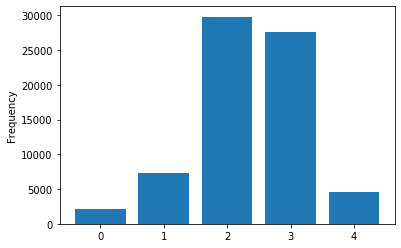

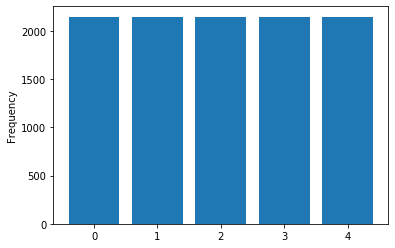

In [13]:
# separate features and target variable
rating = df_movies_cluster['Rating_Label'] # weight
features = df_movies_cluster.drop(columns=['Rating_Label'])

# encode labels
lab_enc = LabelEncoder()
rating = lab_enc.fit_transform(rating)
features["director"] = features["director"].astype(str)
features["director"] = lab_enc.fit_transform(features["director"])

# create a train/test split
features_train, features_test, rating_train, rating_test = train_test_split(features, rating, test_size=0.4, random_state=42, stratify=rating )

print("Train: " + str(len(features_train)) + " Features and " + str(len(rating_train)) + " Ratings")
print("Test: " + str(len(features_test)) + " Features and " + str(len(rating_test)) + " Ratings")

class_dist = pd.Series(rating_train).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
features_balanced_train, rating_balanced_train = sampler.fit_resample(features_train, rating_train)

class_dist = pd.Series(rating_balanced_train).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()


# from imblearn.over_sampling import RandomOverSampler

# sampler = RandomOverSampler()
# features_balanced_train, rating_balanced_train = sampler.fit_resample(features_train, rating_train)

# class_dist = pd.Series(rating_balanced_train).value_counts()
# plt.bar(class_dist.index, class_dist)
# plt.ylabel("Frequency")
# plt.show()

features_train = features_balanced_train
rating_train = rating_balanced_train

Now we do the initial evaluation on all the classifiers again, to see wether there is a difference

In [14]:
##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

print("Scores Random Forest:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_rf)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_rf)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_rf, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_rf, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_rf, average='weighted')))
print()

##### create and fit a KNN
knn_reg = KNeighborsClassifier()
knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn:")
# #compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_knn)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_knn)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_knn, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_knn, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_knn, average='weighted')))
print()

##### create and fit a DecisionTreeClassifier
dt_reg = DecisionTreeClassifier()
dt_reg.fit(features_train, rating_train)
rating_pred_dt = dt_reg.predict(features_test)

print("Scores Decision Tree:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_dt)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_dt)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_dt, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_dt, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_dt, average='weighted')))
print()

##### create and fit a GaussianNB
nb_reg = GaussianNB()
nb_reg.fit(features_train, rating_train)
rating_pred_nb = nb_reg.predict(features_test)

print("Scores Naive Bayes:")
# #compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_nb)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_nb)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_nb, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_nb, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_nb, average='weighted')))
print()

##### create and fit a SVC
svc_reg = LinearSVC()
svc_reg.fit(features_train, rating_train)
rating_pred_svc = svc_reg.predict(features_test)

print("Scores SVC:")
#compute the confusion matrix
# cnf_matrix = confusion_matrix(rating_test, rating_pred_svc)
# print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(rating_test, rating_pred_svc)))
print("Precision: {}".format(precision_score(rating_test, rating_pred_svc, average='weighted')))
print("Recall: {}".format(recall_score(rating_test, rating_pred_svc, average='weighted')))
print("f1_score: {}".format(f1_score(rating_test, rating_pred_svc, average='weighted')))
print()

#plot the confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=lab_enc.classes_, title='KNN Classifier')

print()

# metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))



C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores Random Forest:
Accuracy: 0.2815135771827609
Precision: 0.4323795091515881
Recall: 0.2815135771827609
f1_score: 0.32138477001027865

Scores knn:
Accuracy: 0.21877037629093662
Precision: 0.37857477772210796
Recall: 0.21877037629093662
f1_score: 0.2581207386720466

Scores Decision Tree:
Accuracy: 0.26815724712365646
Precision: 0.4090042112494625
Recall: 0.26815724712365646
f1_score: 0.3051756837441143

Scores Naive Bayes:
Accuracy: 0.06924258040090024
Precision: 0.354629472974552
Recall: 0.06924258040090024
f1_score: 0.07351528267470162



C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Scores SVC:
Accuracy: 0.20215383968197212
Precision: 0.3586469002081029
Recall: 0.20215383968197212
f1_score: 0.2237072347904282




First evaluation:
We can see that the following algortihms got an improvement of accuracy:
- Random forrest
- KNN
- Decision Tree

The following are now worse:
- Naive Bayes
- SVC

We will analyze now KNN and random Forrest again to see if we can tune the models

In [15]:
# create and fit a knn classifier
knn_reg = KNeighborsClassifier()

knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn:")

# specify the parameter grid
parameters = {
    'n_neighbors': range(2, 30)
}


# create the grid search instance
grid_search_estimator = GridSearchCV(knn_reg, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(features_train, rating_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
#display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

Scores knn:
best score is 0.23139264089427108 with params {'n_neighbors': 11}


Scores knn optimized:
Fold 0: Accuracy = 22.790697674418606%
Fold 1: Accuracy = 23.162790697674417%
Fold 2: Accuracy = 22.97674418604651%
Fold 3: Accuracy = 21.3953488372093%
Fold 4: Accuracy = 25.302325581395348%
Fold 5: Accuracy = 22.046511627906977%
Fold 6: Accuracy = 22.88372093023256%
Fold 7: Accuracy = 22.80373831775701%
Fold 8: Accuracy = 23.177570093457945%
Fold 9: Accuracy = 23.925233644859816%
Average Accuracy = 23.046468159095852%

Accuracy on Test Data: 0.21877037629093662
f1_score on Test Data: 0.2581207386720466
[0 1 2 3 4]
Confusion matrix, without normalization
[[ 440  333  249  185  225]
 [1360 1494  947  533  515]
 [4035 4643 5356 3527 2315]
 [2961 2706 3641 5178 3877]
 [ 557  381  416  753  916]]


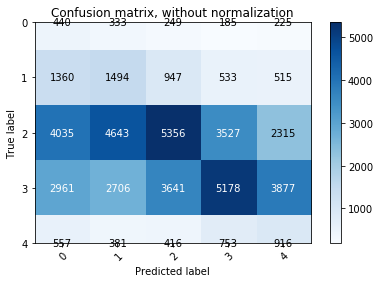

In [16]:
# do now Knn with k = 5 and applie 10 cross fold

# create and fit a knn classifier
knn_reg = KNeighborsClassifier(n_neighbors=5)

knn_reg.fit(features_train, rating_train)
rating_pred_knn = knn_reg.predict(features_test)

print("Scores knn optimized:")

#compute accuracy score

accuracy_knn = cross_val_score(knn_reg, features_train, rating_train, cv=stratified_10_fold_cv, scoring='accuracy')

for i, acc in enumerate(accuracy_knn):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_knn.mean() * 100.0))
print()
print("Accuracy on Test Data: {}".format(accuracy_score(rating_test, rating_pred_knn)))
print("f1_score on Test Data: {}".format(f1_score(rating_test, rating_pred_knn, average='weighted')))

class_names = ['0','1','2','3','4','5']

print(np.unique(ar=rating_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(rating_test, rating_pred_rf, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


In [17]:
##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier()
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

#Tuning of algorithm

# specify the parameter grid
parameters = {
    'max_depth':[3,5,10,None],
     'criterion':["gini", "entropy"],
     'max_features':["auto","log2",None]
}


# create the grid search instance
grid_search_estimator = GridSearchCV(rf_reg, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(features_train, rating_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
#display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
print()


C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


best score is 0.3270610153702841 with params {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}



C:\Users\d060445\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores Random Forrest optimized:
Fold 0: Accuracy = 32.27906976744186%
Fold 1: Accuracy = 31.441860465116278%
Fold 2: Accuracy = 30.976744186046513%
Fold 3: Accuracy = 31.534883720930235%
Fold 4: Accuracy = 30.790697674418606%
Fold 5: Accuracy = 33.58139534883721%
Fold 6: Accuracy = 30.976744186046513%
Fold 7: Accuracy = 29.813084112149536%
Fold 8: Accuracy = 30.74766355140187%
Fold 9: Accuracy = 30.560747663551403%
Average Accuracy = 31.270289067594003%

Accuracy on Test Data: 0.2846686157793997
f1_score on Test Data: 0.31851981775441585
[0 1 2 3 4]
Confusion matrix, without normalization
[[ 362  389  194  173  314]
 [1094 1616  882  585  672]
 [2820 4671 4973 3907 3505]
 [1895 2245 3140 5183 5900]
 [ 372  306  310  635 1400]]


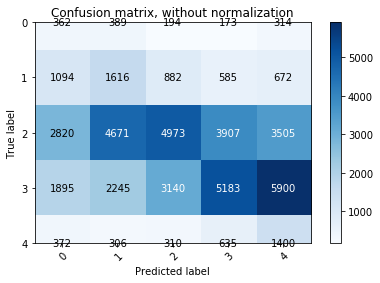

In [18]:
# do now Random Forest with gini, maxdeepth 10 and applie 10 cross fold

##### create and fit a RandomForestClassifier
rf_reg = RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto')
rf_reg.fit(features_train, rating_train)
rating_pred_rf = rf_reg.predict(features_test)

print("Scores Random Forrest optimized:")


#compute accuracy score

accuracy_knn = cross_val_score(rf_reg, features_train, rating_train, cv=stratified_10_fold_cv, scoring='accuracy')

for i, acc in enumerate(accuracy_knn):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_knn.mean() * 100.0))
print()
print("Accuracy on Test Data: {}".format(accuracy_score(rating_test, rating_pred_rf)))
print("f1_score on Test Data: {}".format(f1_score(rating_test, rating_pred_rf, average='weighted')))

class_names = ['0','1','2','3','4','5']

print(np.unique(ar=rating_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(rating_test, rating_pred_rf, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()